In [67]:
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

In [68]:
# load dataset
dic = {}
df = pd.read_csv('./chicago-west-nile-virus-mosquito-test-results/west-nile-virus-wnv-mosquito-test-results.csv', encoding="utf-8")

In [69]:
# Original data
print(df.shape)
print(df.dtypes)
df.head()

(27196, 18)
SEASON YEAR                     int64
WEEK                            int64
TEST ID                         int64
BLOCK                          object
TRAP                           object
TRAP_TYPE                      object
TEST DATE                      object
NUMBER OF MOSQUITOES            int64
RESULT                         object
SPECIES                        object
LATITUDE                      float64
LONGITUDE                     float64
LOCATION                       object
Wards                         float64
Census Tracts                 float64
Zip Codes                     float64
Community Areas               float64
Historical Wards 2003-2015    float64
dtype: object


,SEASON YEAR,WEEK,TEST ID,BLOCK,TRAP,TRAP_TYPE,TEST DATE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,LOCATION,Wards,Census Tracts,Zip Codes,Community Areas,Historical Wards 2003-2015
0,2018,39,47726,4XX W 127TH,T135,GRAVID,2018-09-27T00:09:00.000,2,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,39,47720,5XX W 72ND ST,T035,GRAVID,2018-09-27T00:09:00.000,9,negative,CULEX PIPIENS/RESTUANS,41.763371,-87.637873,"{'longitude': '-87.6378726141474', 'human_addr...",32.0,511.0,21559.0,66.0,17.0
2,2018,39,47690,100XX W OHARE AIRPORT,T913,GRAVID,2018-09-27T00:09:00.000,15,negative,CULEX PIPIENS/RESTUANS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,39,47707,1XX N CENTRAL PARK DR,T030B,SENTINEL,2018-09-27T00:09:00.000,23,negative,CULEX PIPIENS,41.883711,-87.716092,"{'longitude': '-87.71609209177537', 'human_add...",23.0,176.0,21572.0,28.0,11.0
4,2018,39,47733,131XX S BRANDON AVE,T209,GRAVID,2018-09-27T00:09:00.000,2,negative,CULEX RESTUANS,41.657069,-87.546049,"{'longitude': '-87.54604886505916', 'human_add...",47.0,787.0,22250.0,52.0,47.0


In [70]:
# Preprocessing
df = df.dropna() # 去除有空值的row
df = df.drop(columns = ['LOCATION', 'TEST ID', 'TRAP', 'TEST DATE', 'SEASON YEAR', 'WEEK'])
# df['TEST DATE'] = df['TEST DATE'].str.split('T').str[0].str.replace('-', '') # 去掉時間轉為純日期字串
# df['TEST DATE'] = df['TEST DATE'].astype('int64') # 字串轉為 int
nonNumCol = ['BLOCK', 'TRAP_TYPE', 'RESULT', 'SPECIES', 'Zip Codes'] # 非數字欄位

for col in nonNumCol: # 將欄位轉為數值資料
    df[col] = df[col].astype('category')
    dic[col] = dict(enumerate(df[col].cat.categories)) # 類別對照dict
    df[col] = df[col].cat.codes

In [71]:
# New data
# print(dic)
print(df.shape)
print(df.dtypes)
print()
df.head()

(23086, 12)
BLOCK                           int16
TRAP_TYPE                        int8
NUMBER OF MOSQUITOES            int64
RESULT                           int8
SPECIES                          int8
LATITUDE                      float64
LONGITUDE                     float64
Wards                         float64
Census Tracts                 float64
Zip Codes                        int8
Community Areas               float64
Historical Wards 2003-2015    float64
dtype: object



,BLOCK,TRAP_TYPE,NUMBER OF MOSQUITOES,RESULT,SPECIES,LATITUDE,LONGITUDE,Wards,Census Tracts,Zip Codes,Community Areas,Historical Wards 2003-2015
1,108,1,9,0,2,41.763371,-87.637873,32.0,511.0,20,66.0,17.0
3,37,3,23,0,1,41.883711,-87.716092,23.0,176.0,23,28.0,11.0
4,22,1,2,0,3,41.657069,-87.546049,47.0,787.0,33,52.0,47.0
6,83,1,3,0,2,41.774841,-87.728006,15.0,6.0,27,63.0,23.0
7,18,1,5,0,2,41.662387,-87.590180,47.0,174.0,33,48.0,47.0


In [72]:
data = df.to_numpy() # convert to numpy array
print(data[:1])

[[108.           1.           9.           0.           2.
   41.76337092 -87.63787261  32.         511.          20.
   66.          17.        ]]


In [73]:
data = data[:5000] # testing
sil_values = []
for i in range(3, 31):
    clustering = AgglomerativeClustering(n_clusters = i)
    res = clustering.fit(data)
    cluster_labels = res.labels_
    
    silhouette_avg = metrics.silhouette_score(data, cluster_labels)
    sil_values.append(silhouette_avg)
    
    print("Clusters: ", i)
    print("Silhouette Value: ", silhouette_avg)
    print ("Number of sample in each cluster:")
    print (pd.Series(clustering.labels_).value_counts())
    print("========================================")

Clusters:  3
Silhouette Value:  0.5360479256397486
Number of sample in each cluster:
0    2338
1    1736
2     926
dtype: int64
Clusters:  4
Silhouette Value:  0.48093017947871597
Number of sample in each cluster:
0    1736
1    1647
2     926
3     691
dtype: int64
Clusters:  5
Silhouette Value:  0.4337423814625001
Number of sample in each cluster:
0    1647
2     926
1     880
4     856
3     691
dtype: int64
Clusters:  6
Silhouette Value:  0.39787074844714265
Number of sample in each cluster:
2    1145
0     926
1     880
4     856
3     691
5     502
dtype: int64
Clusters:  7
Silhouette Value:  0.3903358918432263
Number of sample in each cluster:
0    1145
1     880
4     856
3     691
5     578
2     502
6     348
dtype: int64
Clusters:  8
Silhouette Value:  0.42002473419333364
Number of sample in each cluster:
0    880
1    856
7    784
3    691
5    578
2    502
4    361
6    348
dtype: int64
Clusters:  9
Silhouette Value:  0.43281762681534053
Number of sample in each cluster:
0

In [74]:
print(sil_values)
max_sil = max(sil_values)
idx = sil_values.index(max_sil)+3  # index+3 = number of clusters
print(idx, max_sil)

[0.5360479256397486, 0.48093017947871597, 0.4337423814625001, 0.39787074844714265, 0.3903358918432263, 0.42002473419333364, 0.43281762681534053, 0.43393161083762344, 0.4254702128376162, 0.4249155812675786, 0.43300030646813786, 0.4480734528487956, 0.4540985045569851, 0.4613563587318038, 0.4753068317837029, 0.47242407932441, 0.4711862993591355, 0.4765670865657109]
3 0.5360479256397486


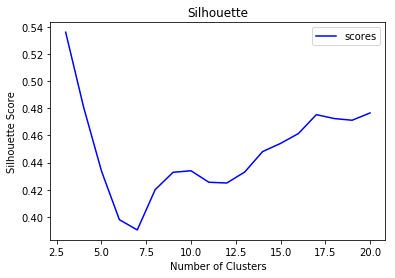

In [75]:
plt.title('Silhouette')
plt.plot(range(3, 31), sil_values, color='blue', label='scores')
plt.legend()
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [76]:
clustering = AgglomerativeClustering(n_clusters = idx)
result = clustering.fit(data)
print(result)
print(result.labels_)
print (pd.Series(clustering.labels_).value_counts())

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func='deprecated')
[2 0 1 ... 0 1 1]
0    2338
1    1736
2     926
dtype: int64


In [77]:
cols = list(df.columns.values)
print(len(cols))
print(cols)
col_pairs = []
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        col_pairs.append([cols[i], cols[j]])
print(len(col_pairs))
# print(col_pairs)

12
['BLOCK', 'TRAP_TYPE', 'NUMBER OF MOSQUITOES', 'RESULT', 'SPECIES', 'LATITUDE', 'LONGITUDE', 'Wards', 'Census Tracts', 'Zip Codes', 'Community Areas', 'Historical Wards 2003-2015']
66


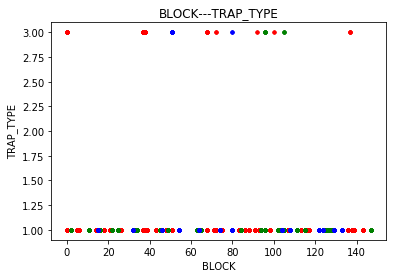

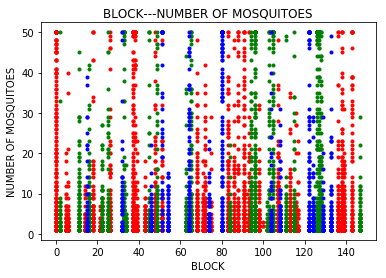

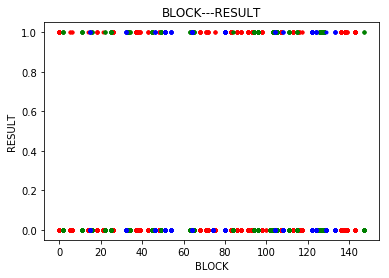

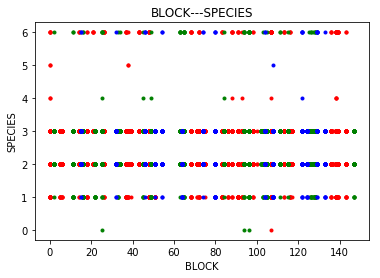

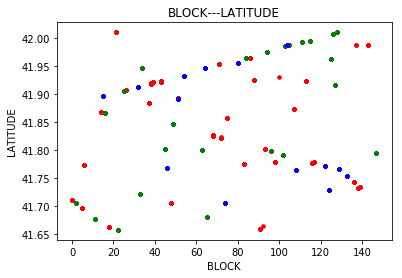

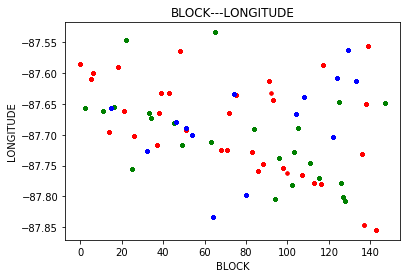

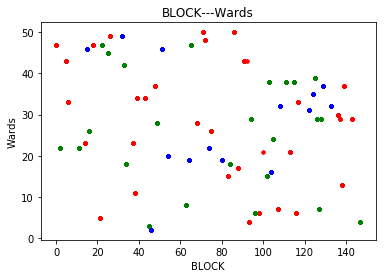

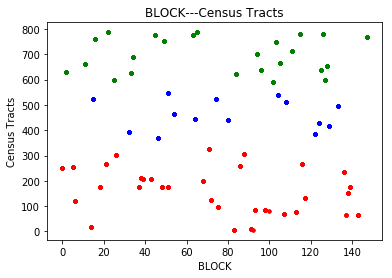

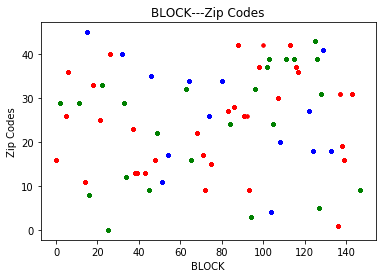

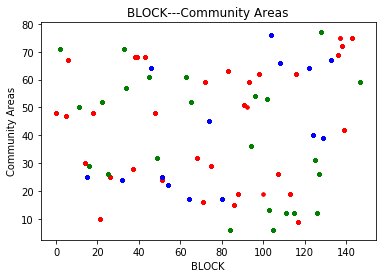

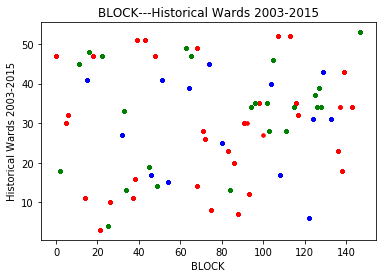

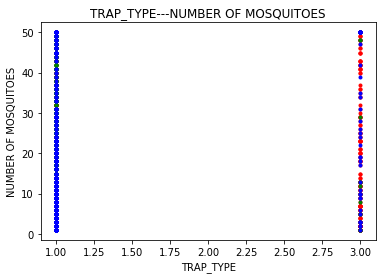

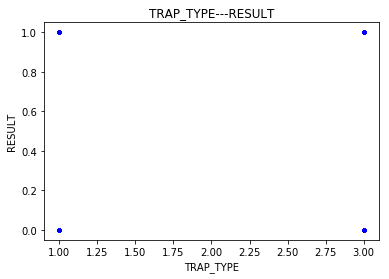

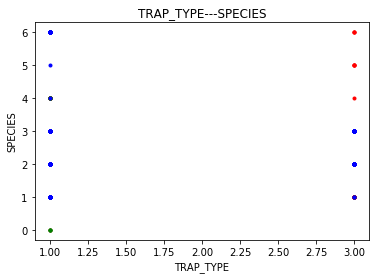

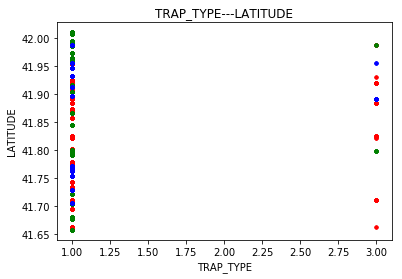

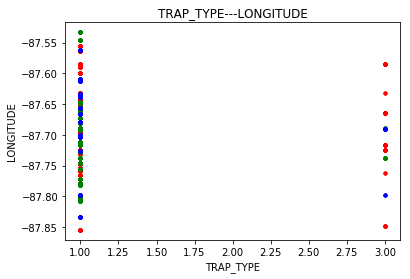

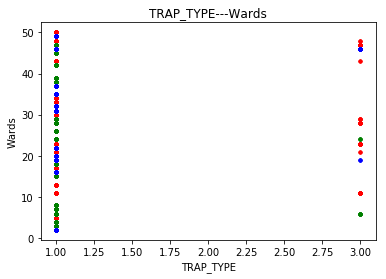

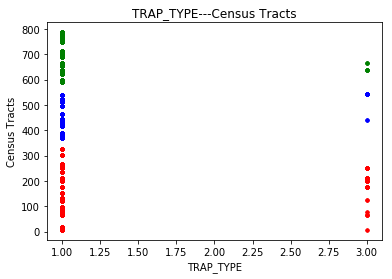

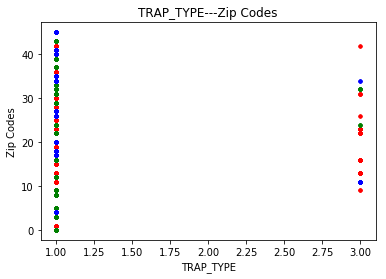

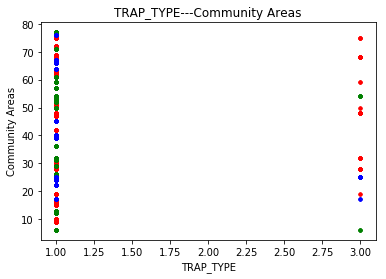

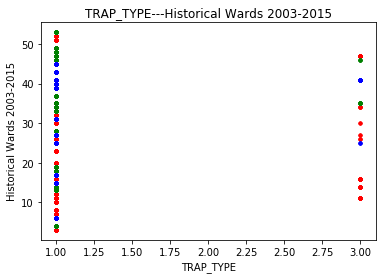

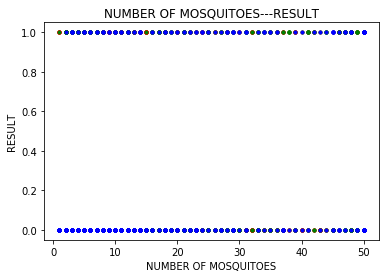

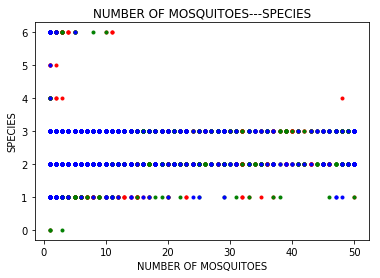

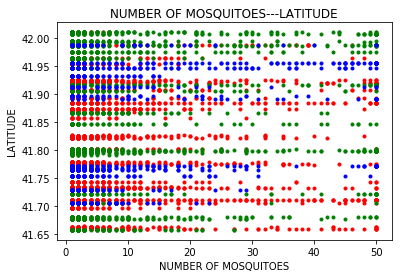

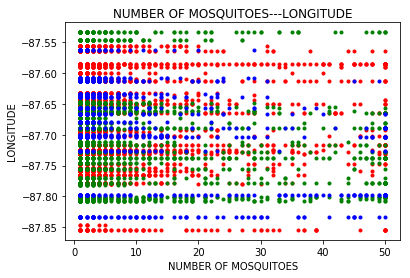

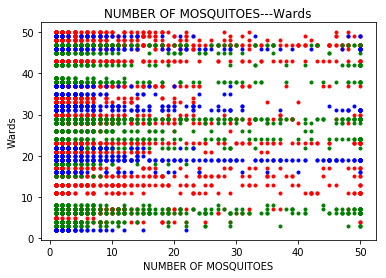

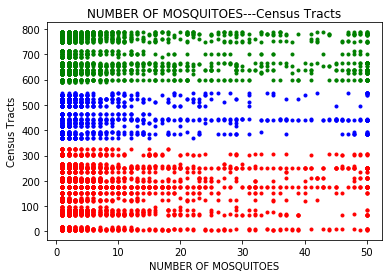

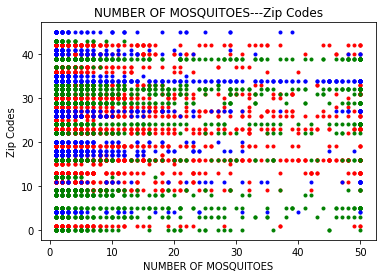

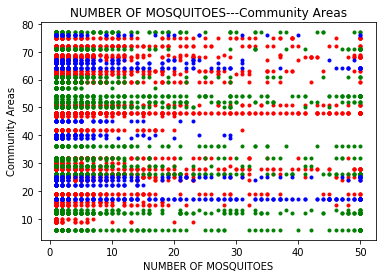

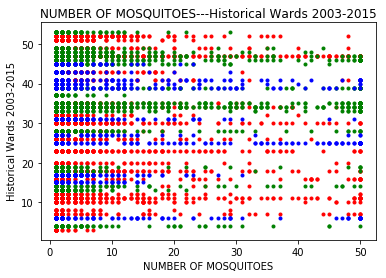

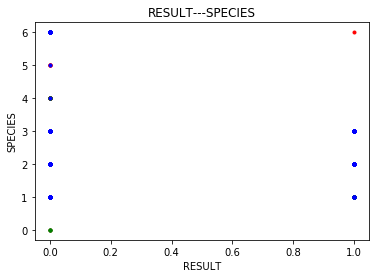

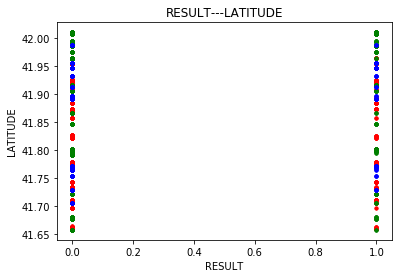

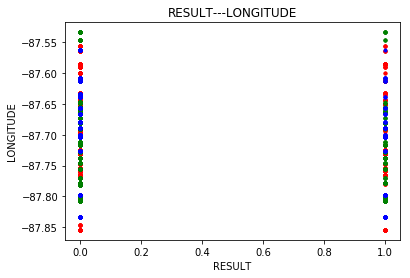

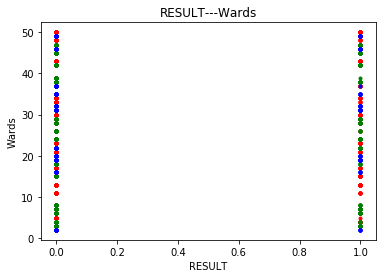

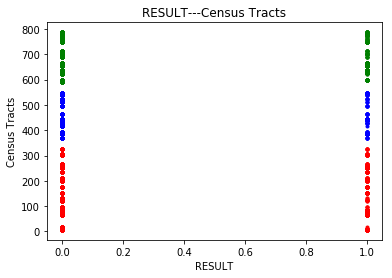

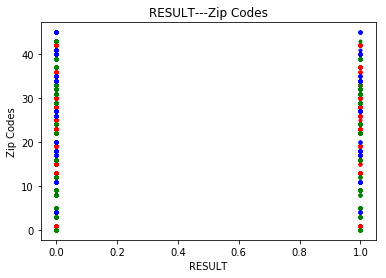

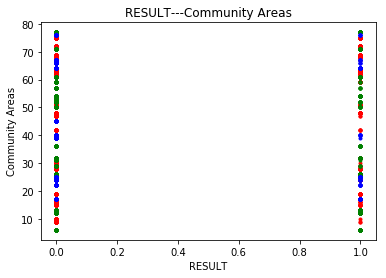

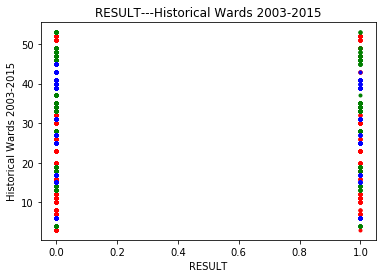

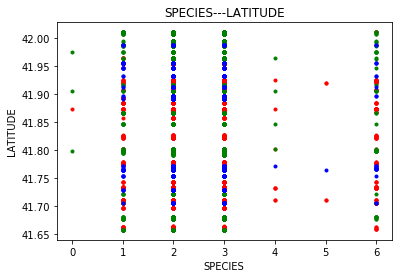

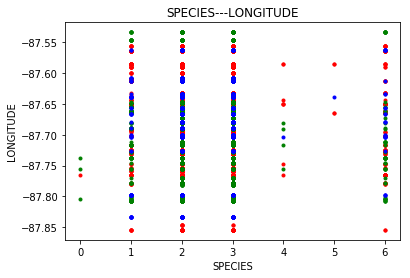

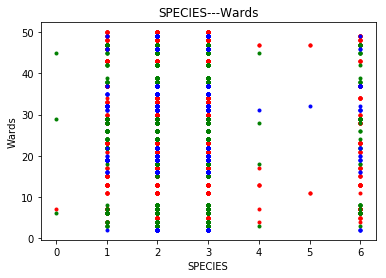

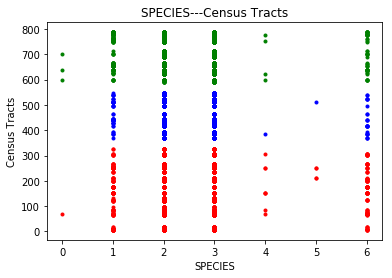

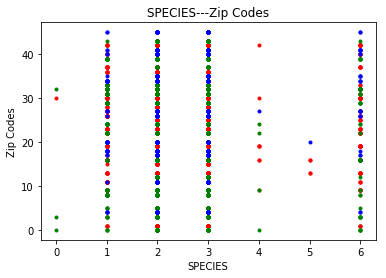

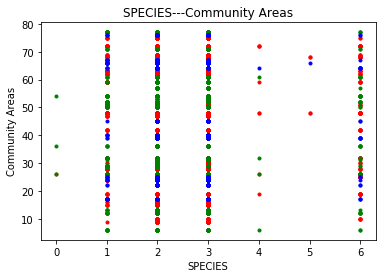

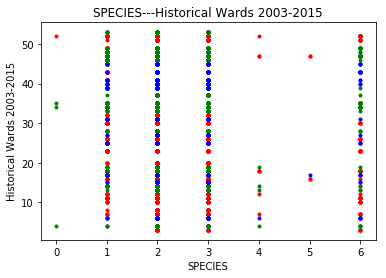

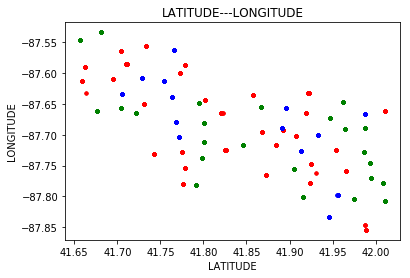

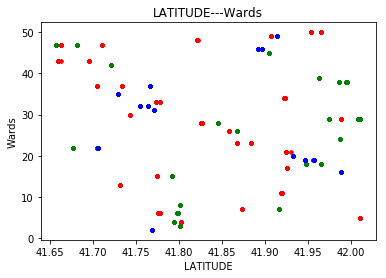

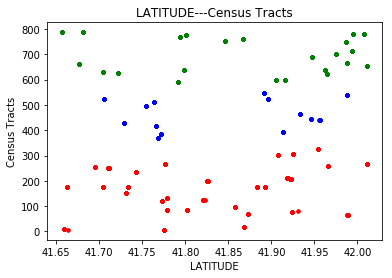

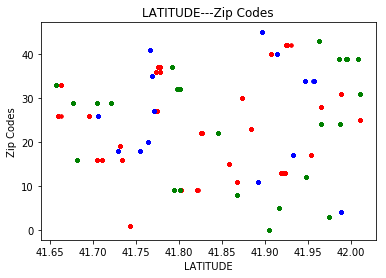

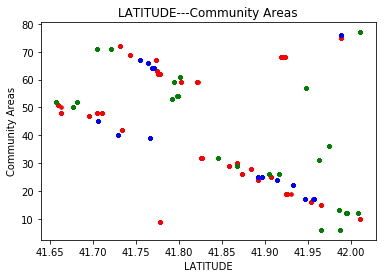

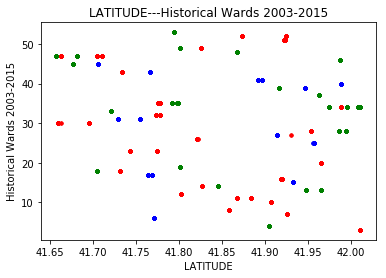

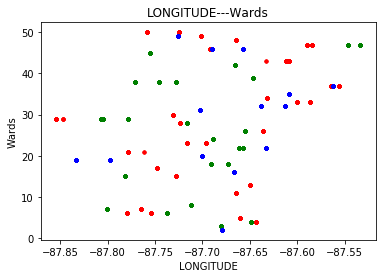

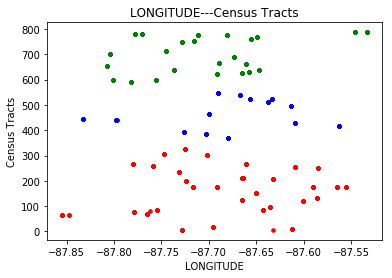

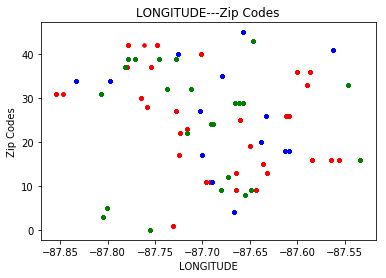

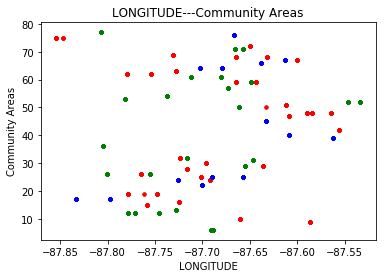

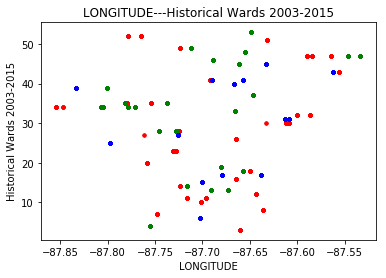

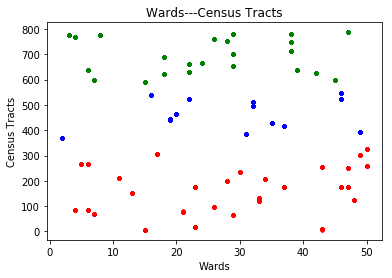

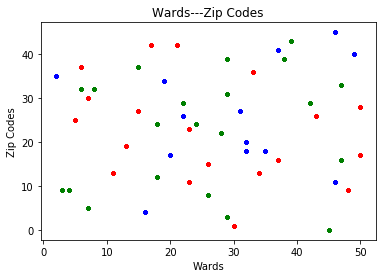

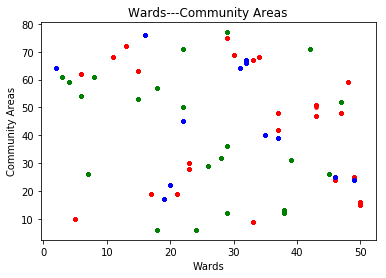

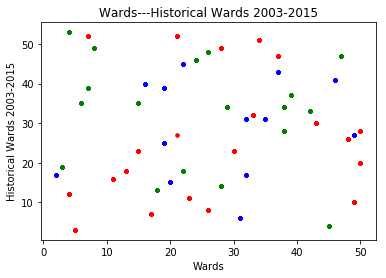

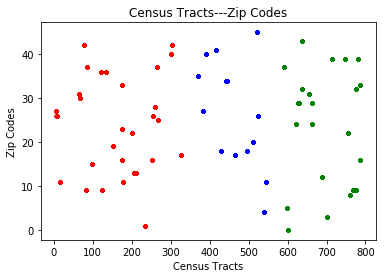

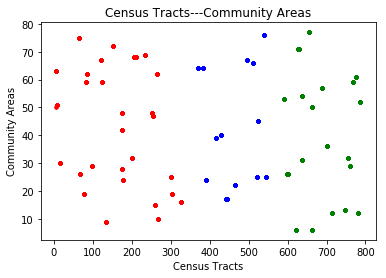

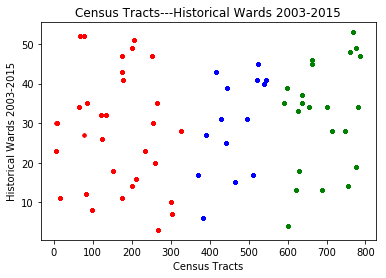

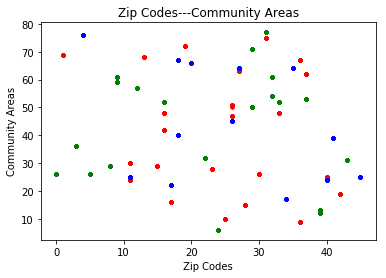

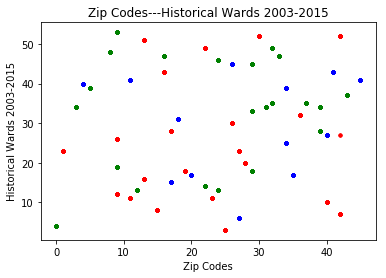

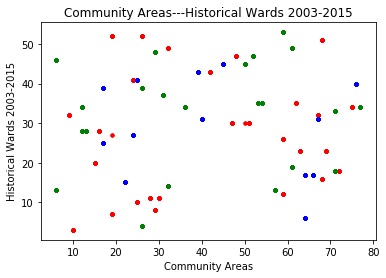

In [78]:
colors = ['r.', 'g.', 'b.', 'c.', 'm.', 'y.', 'k.', 'r*', 'g*', 'b*', 'c*', 'm*', 'y*', 'k*']
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        plt.figure()
        for c in range(idx):
            plt.plot(data[result.labels_ == c][:, i], data[result.labels_ == c][:, j], colors[c])             
        plt.xlabel(cols[i])
        plt.ylabel(cols[j])
        plt.title(cols[i]+'---'+cols[j])
        plt.show()